In [3]:
df <- read.csv("SCFP2013.csv")

In [4]:
df.new = df[seq(1, nrow(df), 5), ]

In [5]:
head(df.new)

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,⋯,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NW10CAT,INC10CAT,NINC10CAT
1,1,11,3100.802,1,54,3,11,2,2,1,⋯,0,0,1,1,1,2,1,2,2,4
6,2,21,5888.637,1,22,1,16,4,2,0,⋯,0,0,1,2,1,1,1,1,3,2
11,3,31,5240.325,1,53,3,12,2,1,0,⋯,0,0,1,3,2,3,2,2,6,6
16,4,41,2605.658,1,48,3,17,4,1,1,⋯,0,0,5,5,6,5,2,10,9,9
21,5,51,4019.607,1,57,4,16,4,1,0,⋯,0,0,4,4,5,4,2,9,8,8
26,6,61,7805.529,2,63,4,12,2,2,0,⋯,0,0,2,2,2,2,1,5,4,4


In [6]:
write.csv(df.new, "SCFP2013S.csv",row.names=FALSE)

In [2]:
df1 <- read.csv("SCFP2013S.csv")

In [3]:
head(df1)

YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,⋯,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NW10CAT,INC10CAT,NINC10CAT
1,11,3100.802,1,54,3,11,2,2,1,⋯,0,0,1,1,1,2,1,2,2,4
2,21,5888.637,1,22,1,16,4,2,0,⋯,0,0,1,2,1,1,1,1,3,2
3,31,5240.325,1,53,3,12,2,1,0,⋯,0,0,1,3,2,3,2,2,6,6
4,41,2605.658,1,48,3,17,4,1,1,⋯,0,0,5,5,6,5,2,10,9,9
5,51,4019.607,1,57,4,16,4,1,0,⋯,0,0,4,4,5,4,2,9,8,8
6,61,7805.529,2,63,4,12,2,2,0,⋯,0,0,2,2,2,2,1,5,4,4


In [4]:
dim(df1)

[1] 6015  324

# Data Cleaning / Transforms

In [5]:
# Make new variable that calculates the percentage of the house that been paid off. 
df1$PCTHPAID <- df1$HOMEEQ/df1$HOUSES;
df1$PCTHPAID[is.nan(df1$PCTHPAID)] <- 0 ; head(df1$PCTHPAID)

[1] 0.0000000 0.0000000 1.0000000 0.4484211 1.0000000 1.0000000

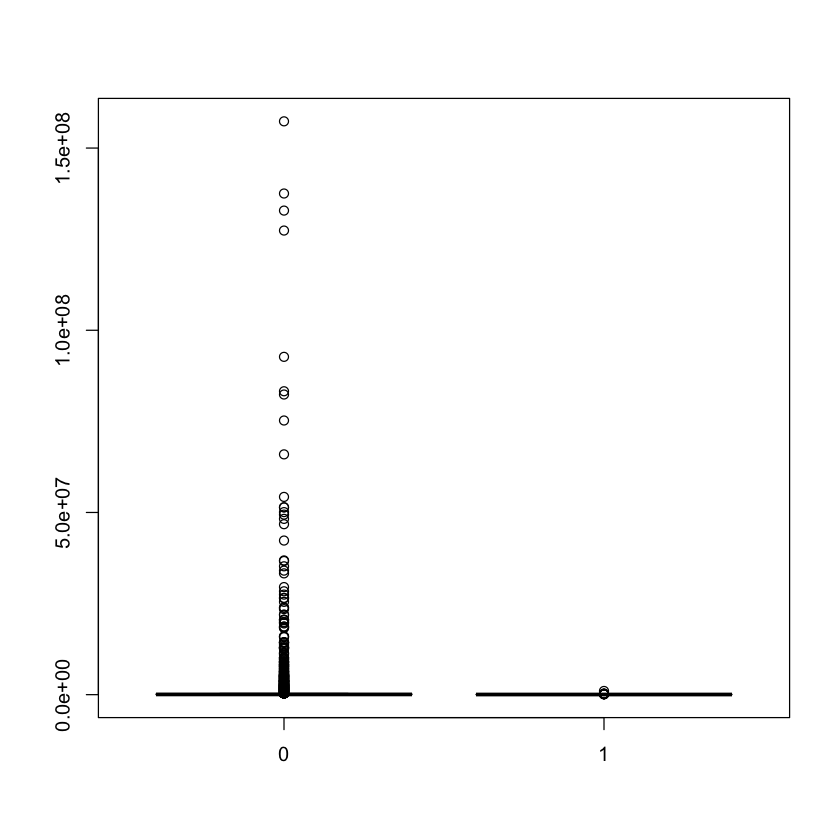

In [6]:
plot(factor(df1$LATE60),df1$NORMINC)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        1     31450     65940    707700    150300 157300000 

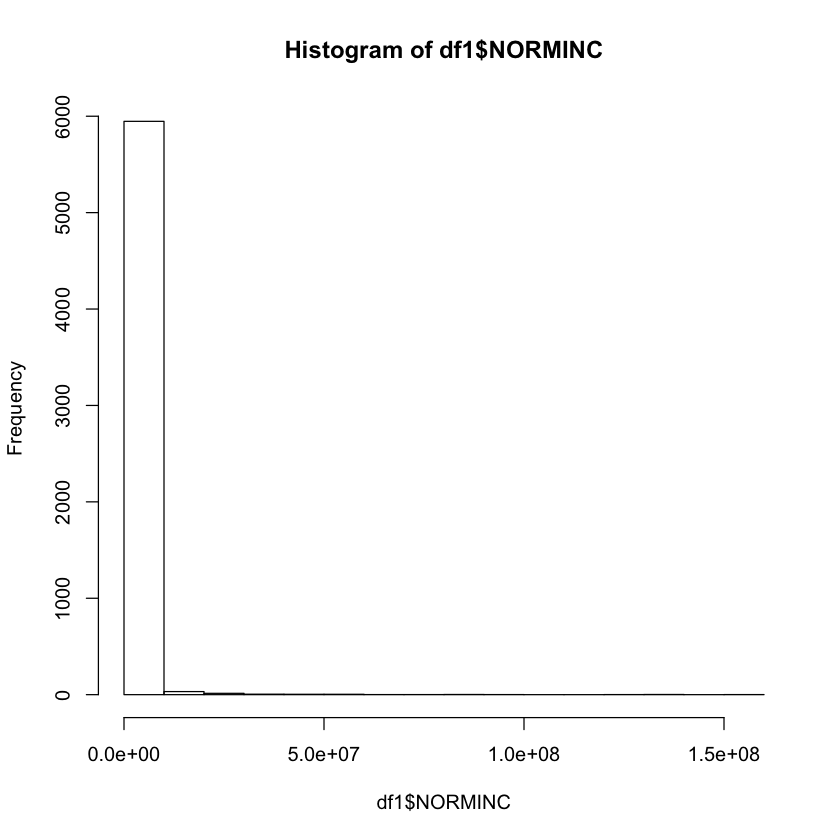

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.017  10.360  11.100  11.350  11.920  18.870 

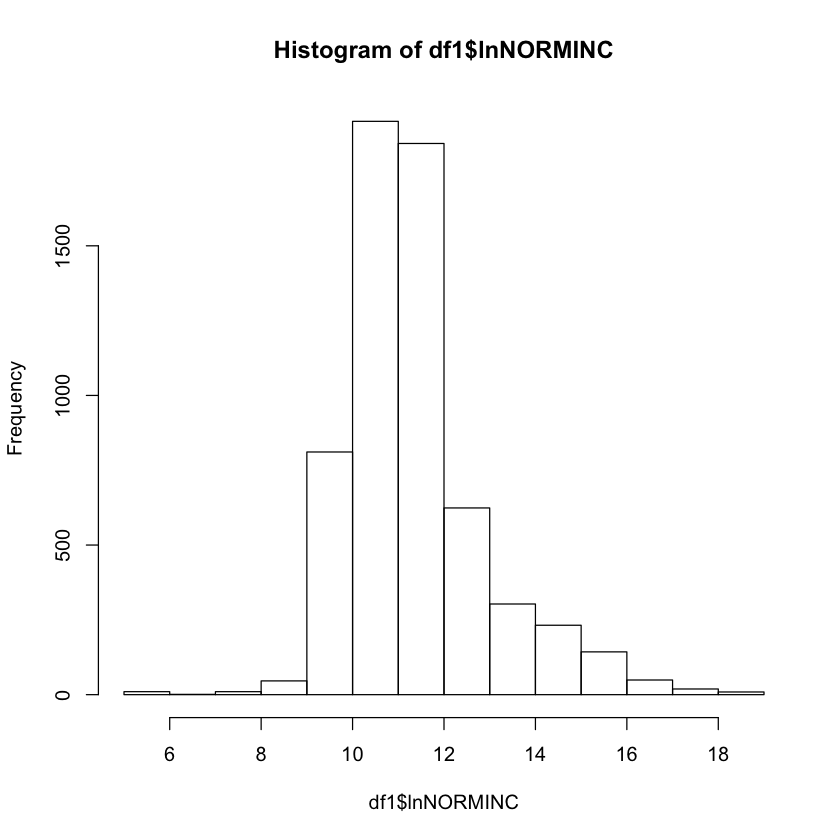

In [11]:
#NORMINC Variable (Normalized Income)
hist(df1$NORMINC)

summary(df1$NORMINC)
# Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
#   0     31450     65940    707700    150300 157300000 

#Do we care about the distribution of the explanatory variables? How do we determine if we need to transform the variable?
# Mean VS Median

#Reassign 0 to 1
df1$NORMINC[df1$NORMINC==0] <- 1

#So, we log transform it to make it less skewed
df1$lnNORMINC <- log(df1$NORMINC+150)
hist(df1$lnNORMINC)
summary(df1$lnNORMINC)

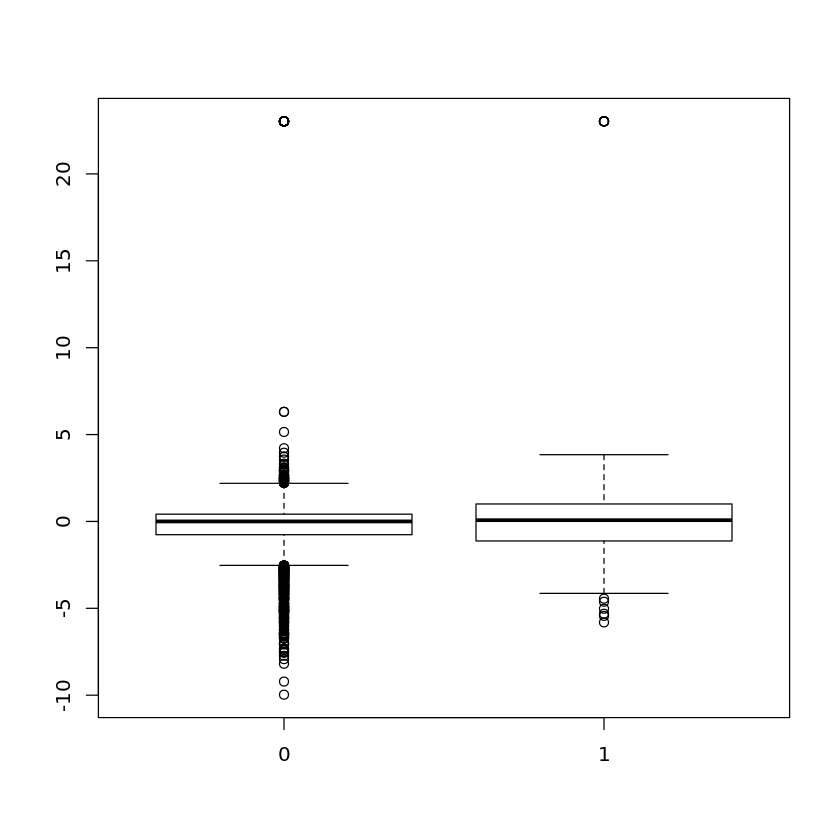

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 0.000e+00 1.000e+00 4.821e+07 2.000e+00 1.000e+10 

   Mode   FALSE    NA's 
logical    6015       0 

   Mode   FALSE    NA's 
logical    6015       0 

Warning message in eval(expr, envir, enclos):
“NaNs produced”

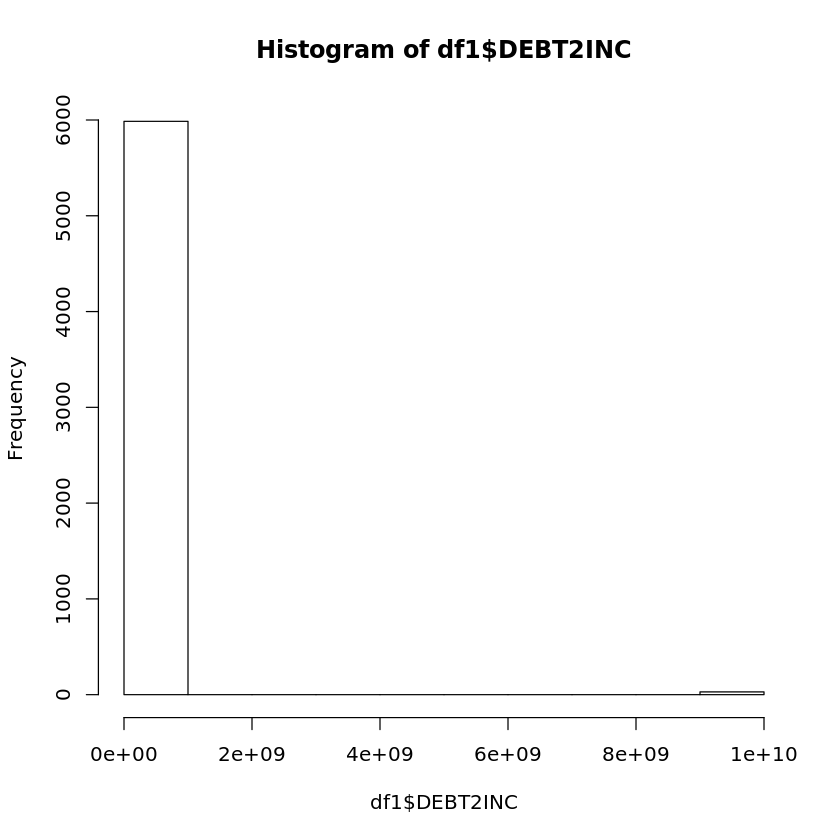

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -2.541  -0.280   0.137   0.529   0.538  10.000    5401 

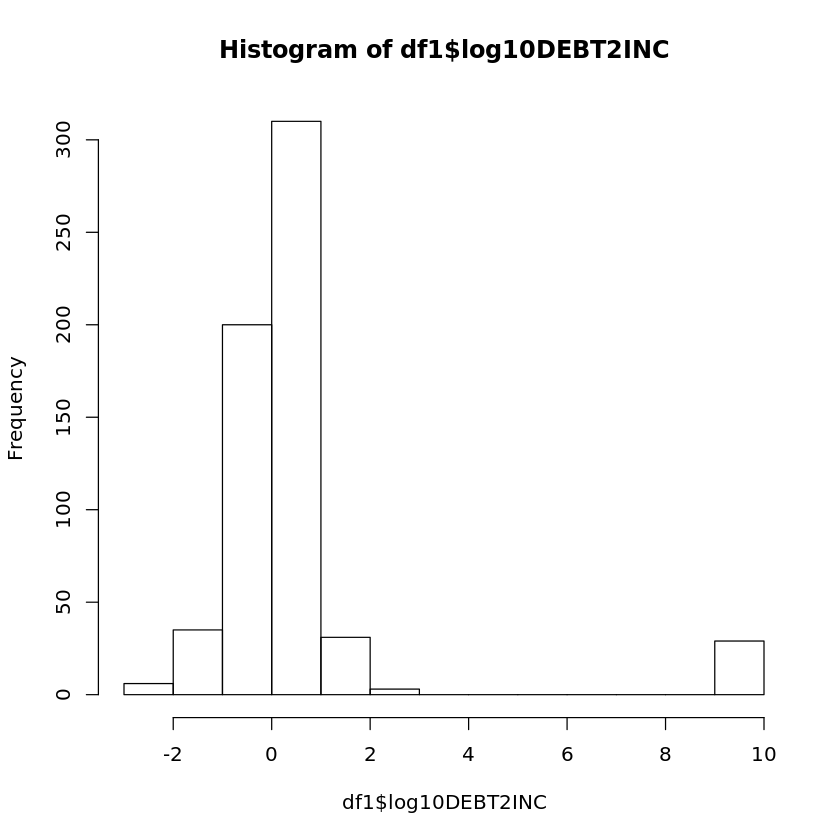

In [79]:
#DEBT2INC Variable
###---###
# debt to income ratio, if no income, assign arbitrary value of 10 to
#  IF (DEBT > 0 & INCOME > 0) THEN DEBT2INC=(DEBT/INCOME);
#  ELSE IF (DEBT > 0 & INCOME=0) THEN DEBT2INC=10;
#  ELSE DEBT2INC=0; 
###---###

plot(factor(df1$LATE60),log(df1$DEBT2INC))

hist(df1$DEBT2INC)

summary(df1$DEBT2INC)

# Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
#  0.0000   0.0000   0.3816   1.4170   1.5820 549.9000 

#Check the number of 10s and 0s present.
summary(df1$DEBT2INC==10)
summary(df1$DEBT2INC==0)

#   Mode   FALSE    TRUE    NA's 
#logical    5986      29       0 
#   Mode   FALSE    TRUE    NA's 
#logical    4368    1647       0 


#So, we'll like to transform the variable.
#Decided to transform 10 -> 10^10 to preserve the value 10, log10(10^10)=10. Similarly, 0 -> 1 so that log10(1)=0 
df1$DEBT2INC[df1$DEBT2INC==10] <-10^10
df1$DEBT2INC[df1$DEBT2INC==0] <- 1

#DEBT2INC TRANSFORM
df1$log10DEBT2INC <- log10(df1$DEBT2INC - 3)
hist(df1$log10DEBT2INC)
summary(df1$log10DEBT2INC)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      0.55      1.00     34.82      1.01 190400.00 

   Mode   FALSE    NA's 
logical    6015       0 

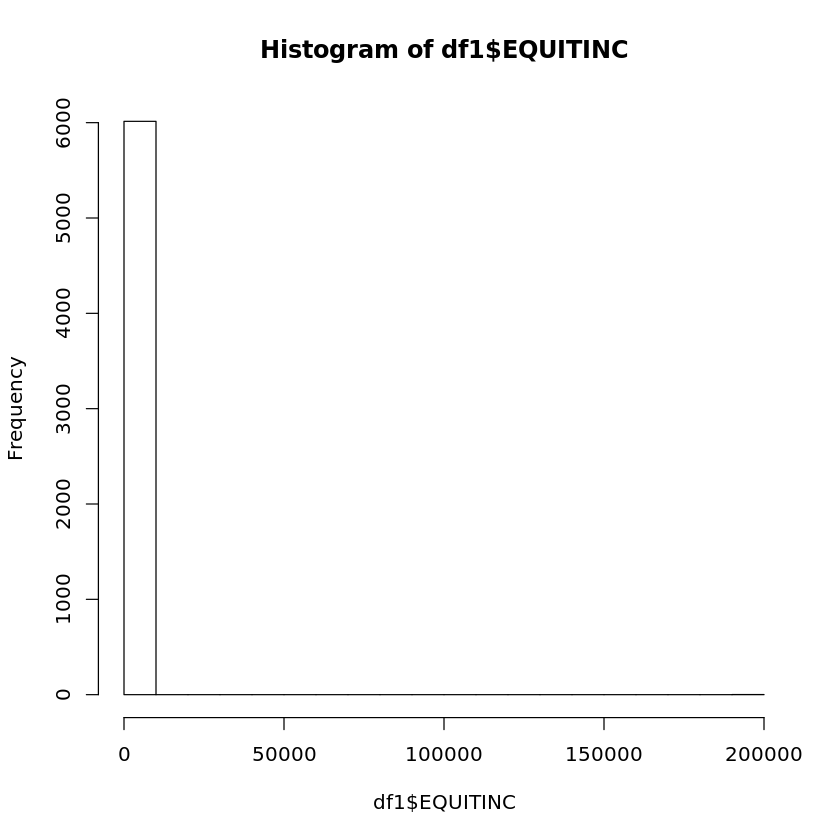

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0039   0.7403   1.0000   1.2010   1.0030 436.3000 

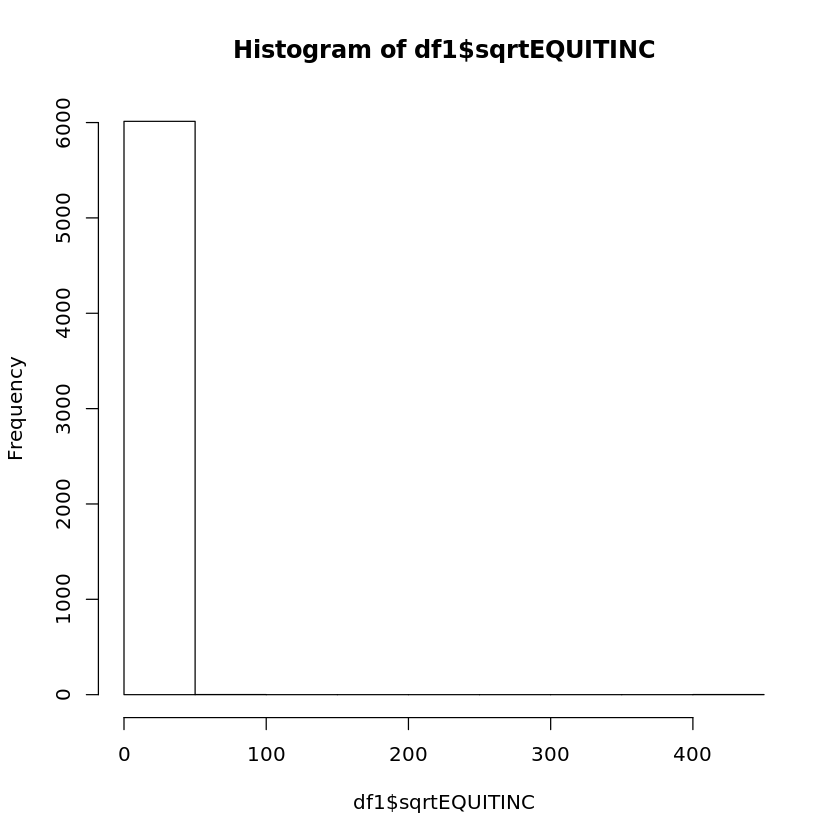

In [24]:
#EQUITYINC TRANSFORM
summary(df1$EQUITINC)
#      Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
#     0.00      0.00      0.05     34.39      1.01 190400.00 

hist(df1$EQUITINC)

summary(df1$EQUITINC==0)
#   Mode   FALSE    TRUE    NA's 
#logical    3422    2593       0 

#Replace 0s with 1s. So that when we take ln(1) = 0
df1$EQUITINC[df1$EQUITINC==0] <- 1

#We decided to use the sqrt transform
df1$sqrtEQUITINC <- sqrt(df1$EQUITINC)
hist(df1$sqrtEQUITINC)
summary(df1$sqrtEQUITINC)


# Creating Dummy Variables

There are 4 variables that we have to create dummy variables for:
* KIDS
* WSAVED
* EDCL
* EXPENSHILO

In [43]:
table(df1$LATE60,df1$KIDS)
table(df1$LATE60,df1$WSAVED)
table(df1$LATE60,df1$EDCL)
table(df1$LATE60,df1$EXPENSHILO)

   
       0    1    2    3    4    5    6    7    8
  0 3272  965  842  390  131   37    9    2    1
  1  144   90   73   34   17    5    3    0    0

   
       1    2    3
  0  686 1497 3466
  1  135  131  100

   
       1    2    3    4
  0  512 1467  928 2742
  1   32  134  100  100

   
       1    2    3
  0 1688  238 3723
  1  159   28  179

In [45]:
mean(df1$LATE60)

[1] 0.06084788

In [7]:
# 0 = no , # 1 yes . #There are 366 respondents that were behind in his/her payment by two months or more.
t = as.data.frame(table(df1$LATE))
t

Var1,Freq
0,5216
1,799


In [16]:
df2 <- df1[,c('EDCL', 'KIDS', 'RACE', 'WSAVED', 'EXPENSHILO', 'NORMINC', 'LATE60', 'TURNDOWN', 'EQUITINC', 'HOTHFIN','NETWORTH','DEBT2INC')]

In [17]:
w = as.data.frame(table(df1$RACE))
w

Var1,Freq
1,4423
2,747
3,555
5,290


In [10]:
df1$PHOWN = df1$HOMEEQ/df1$HOUSES

In [11]:
df1$PHOWN[is.na(df1$PHOWN)] <- 0
#df1$PHOWN <- replace(df1$PHOWN, is.na(df1$PHOWN), 0)

In [12]:
head(df1$PHOWN)

[1] 0.0000000 0.0000000 1.0000000 0.4484211 1.0000000 1.0000000

In [39]:
(df1$INCOME)/1000

[1] 2.029063e+01 2.231969e+01 5.275563e+01 1.511652e+02 9.942408e+01
   [6] 3.246501e+01 1.572524e+02 5.275563e+01 2.739235e+01 4.261032e+01
  [11] 1.268164e+02 1.055113e+02 4.869751e+01 9.232236e+01 1.298600e+03
  [16] 1.440635e+03 3.246501e+01 2.282696e+02 5.894428e+02 1.318891e+01
  [21] 5.072657e+01 1.115985e+02 1.339181e+02 2.130516e+01 0.000000e+00
  [26] 7.781456e+03 1.521797e+02 1.420344e+01 9.130783e+01 1.156566e+03
  [31] 1.288455e+02 4.565391e+01 7.101720e+01 4.819024e+02 2.840688e+02
  [36] 4.463938e+01 1.826157e+01 1.826157e+01 1.826157e+02 4.768298e+01
  [41] 4.768298e+01 8.116251e+00 1.420344e+01 1.826157e+02 3.368244e+02
  [46] 8.826423e+00 2.424730e+03 2.475457e+02 4.869751e+01 1.927610e+01
  [51] 1.207292e+02 4.869751e+01 8.623517e+01 7.608986e+01 1.521797e+01
  [56] 1.633396e+03 5.255273e+02 2.231969e+01 1.795721e+02 9.739502e+00
  [61] 5.478470e+01 5.736161e+03 2.942141e+01 8.735116e+01 1.623250e+01
  [66] 1.552233e+03 9.333689e+01 4.159579e+01 1.491361e+02 3.550860e+01
  [71] 1.623250e+02 1.724703e+01 2.982722e+02 1.115985e+01 1.375299e+05
  [76] 3.145047e+01 6.391548e+01 9.536595e+01 2.130516e+02 3.652313e+01
  [81] 9.638049e+01 1.115985e+02 6.695907e+01 6.188642e+01 2.556619e+02
  [86] 8.724970e+01 1.714558e+03 2.942141e+01 3.145047e+01 1.420344e+01
  [91] 1.075403e+03 6.797361e+01 1.014531e+01 2.637782e+01 1.115985e+02
  [96] 1.258019e+02 4.261032e+01 1.115985e+01 3.820725e+01 3.145047e+01
 [101] 1.151625e+04 7.213319e+03 4.666845e+01 2.526183e+03 2.637782e+01
 [106] 4.462924e+04 1.217438e+01 1.156566e+03 9.130783e+00 1.521797e+01
 [111] 6.898814e+01 6.391548e+01 1.734849e+02 6.797361e+01 6.087189e+02
 [116] 2.029063e+02 2.333422e+01 1.318891e+01 3.753766e+01 4.058126e+01
 [121] 6.188642e+01 3.368244e+02 3.449407e+01 8.927877e+01 1.014531e+02
 [126] 5.478470e+01 1.775430e+02 7.101720e+01 6.391548e+03 1.115985e+02
 [131] 3.043594e+01 3.043594e+02 2.181243e+02 4.768298e+01 6.087189e+01
 [136] 7.608986e+02 4.768298e+01 6.290095e+01 1.927610e+01 1.521797e+01
 [141] 3.652313e+01 8.522064e+00 5.691521e+01 2.516038e+02 6.391548e+01
 [146] 7.304626e+01 6.898814e+02 6.898814e+01 2.049353e+02 2.840688e+01
 [151] 4.961059e+02 1.978336e+04 3.652313e+01 7.000267e+01 2.434875e+01
 [156] 7.101720e+01 2.248202e+01 9.435142e+01 5.174110e+00 8.522064e+01
 [161] 8.065525e+02 3.256646e+03 1.115985e+01 9.455433e+02 3.246501e+01
 [166] 3.043594e+01 1.471071e+02 4.971204e+01 3.652313e+01 2.029063e+01
 [171] 3.652313e+01 1.014531e+01 6.756779e+01 1.126130e+03 1.420344e+01
 [176] 1.836302e+03 2.029063e+01 9.455433e+03 4.362485e+01 1.349327e+01
 [181] 5.072657e+01 1.947900e+02 1.278310e+02 3.550860e+01 9.029330e+01
 [186] 4.078416e+02 5.782829e+02 1.044967e+03 5.579923e+01 3.043594e+01
 [191] 8.035089e+02 5.579923e+01 1.613105e+02 1.623250e+02 3.855219e+01
 [196] 3.652313e+01 6.188642e+01 2.333422e+01 6.097334e+02 1.937755e+02
 [201] 1.826157e+02 9.840955e+01 1.755139e+02 1.217438e+02 1.014531e+03
 [206] 8.522064e+01 4.058126e+02 3.956673e+01 1.826157e+01 2.942141e+01
 [211] 7.304626e+01 2.029063e+01 1.562378e+03 2.130516e+01 5.823410e+02
 [216] 4.971204e+01 8.927877e+01 0.000000e+00 2.536329e+02 1.014531e+02
 [221] 7.690148e+03 4.869751e+00 4.159579e+01 7.608986e+01 5.072657e+01
 [226] 7.101720e+01 8.927877e+01 3.956673e+01 1.126130e+03 2.333422e+01
 [231] 0.000000e+00 1.795721e+02 4.555246e+02 4.463938e+01 2.637782e+01
 [236] 9.435142e+01 4.565391e+01 4.058126e+01 2.191388e+03 4.565391e+01
 [241] 3.043594e+01 1.521797e+01 1.785575e+02 8.217705e+01 1.623250e+01
 [246] 3.652313e+01 1.318891e+01 0.000000e+00 2.681407e+03 2.059499e+03
 [251] 5.072657e+01 5.275563e+01 1.197147e+03 8.927877e+01 2.637782e+02
 [256] 4.768298e+01 2.130516e+01 1.897174e+02 3.347954e+01 1.521797e+01
 [261] 4.129143e+02 1.115985e+02 8.339448e+03 1.623250e+01 6.087189e+00
 [266] 3.652313e+01 9.333689e+01 6.655326e+02 3.855219e+01 1.014531e+01
 [271] 4.565391e+01 3.753766e+01 4.676990e+02 5.072657e+02 9.435142e+01
 [276] 4.362485e+01 4.666845e+01 2.657058e+

In [40]:
summary(df1$NORMINC/1000)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00     31.45     65.94    707.70    150.30 157300.00 

In [21]:
fit <- glm(factor(LATE60)~., df2, family = "binomial")
summary(fit)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = factor(LATE60) ~ ., family = "binomial", data = df2)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients:
              Estimate Std. Error    z value Pr(>|z|)    
(Intercept) -1.736e+15  4.517e+06 -384381099   <2e-16 ***
EDCL        -3.141e+14  8.551e+05 -367375095   <2e-16 ***
KIDS        -1.504e+13  7.461e+05  -20159169   <2e-16 ***
RACE        -9.216e+13  8.744e+05 -105394805   <2e-16 ***
WSAVED       1.058e+15  1.255e+06  842639721   <2e-16 ***
EXPENSHILO  -2.510e+14  9.604e+05 -261317134   <2e-16 ***
NORMINC      5.620e+06  2.409e-01   23327567   <2e-16 ***
TURNDOWN    -1.848e+14  2.446e+06  -75543335   <2e-16 ***
EQUITINC    -1.304e+10  3.529e+02  -36941580   <2e-16 ***
HOTHFIN      1.140e+14  3.028e+06   37645041   <2e-16 ***
NETWORTH    -6.350e+06  2.282e-02 -278253442   <2e-16 ***
DEBT2INC     5.101e+12  8.235e+04   61943930   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 

In [ ]:
drops <- c("YY1","Y1","SAVERES1","SAVERES2","SAVERES3","SAVERES4","SAVERES5","SAVERES6","SAVERES7","SAVERES8","SAVERES9"
          ,"BSHOPMODR","ISHOPMODR","IOTHER","OTHER","CKOTHCHOOSE","NMMF","BOND","RETQLIQ","OTHMA","DEQ","NVEHIC","HOUSECL"
          ,"NONACTBUS","NFIN","NHNFIN","ASSET","NH_MORT","REFIN_EVER","MORT1","MORT2","MORT3","OTH_INST","DEBT","NETWORTH"
          ,"KGTOTAL","PAYORE3")
DF[ , !(names(DF) %in% drops)]

In [17]:
fit1 <- glm(LATE60~NETWORTH, df1, family = "binomial")
summary(fit1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = LATE60 ~ NETWORTH, family = "binomial", data = df1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4302  -0.4367  -0.3828  -0.1232   6.2173  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.274e+00  6.048e-02 -37.602  < 2e-16 ***
NETWORTH    -1.399e-06  1.993e-07  -7.023 2.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2758.4  on 6014  degrees of freedom
Residual deviance: 2547.2  on 6013  degrees of freedom
AIC: 2551.2

Number of Fisher Scoring iterations: 13
